1th layer: mean=0.500 SD=0.261
2th layer: mean=0.501 SD=0.171
3th layer: mean=0.499 SD=0.161
4th layer: mean=0.505 SD=0.170
5th layer: mean=0.518 SD=0.173


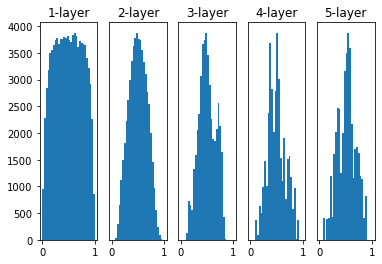

In [2]:
# investigation on initial weights
# compare_initial_weights.ipynb
import numpy as np
import matplotlib.pyplot as plt

# activation function (you can add here!)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

node_num = 100  # the number of neurons in hidden layers
input_data_num = 1000 # the number of random data

input_data = np.random.randn(input_data_num, node_num)  # input data
hidden_layer_size = 5  # number of hidden layers  input-100-100-100-100-100-output
activations = {}  # storage list for activation of neurons 

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    ########## try various initial weights. ##########
    #w = np.random.randn(node_num, node_num) * 10
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(0.5 / node_num)
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # Xavier's
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He's
    #w = np.random.randn(node_num, node_num) * np.sqrt(10.0 / node_num)

    a = np.dot(x, w)


    ######## try various activation functions.  ########
    z = sigmoid(a)
    #z = ReLU(a)
    #z = tanh(a)

    activations[i] = z
    print('{:d}th layer: mean={:.3f} SD={:.3f}'.format(i+1,np.mean(z), np.std(z)))

# drawing a histogram of activation
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000) # to focus on the distribution
    plt.hist(a.flatten(), 30, range=(0,1)) #if you choose ReLU change (0,5) or so
plt.show()